
# Machine Learning Assignment 5   
# Kadin McWilliams
# CS 430
# Machine Learning in the Cloud

## Standard Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook.

In [3]:
# Importing Voting, Bagging, Random Forest, and AdaBooster Classifiers
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

## Imports for Splitting Data and Building Pipeline


In [4]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Imports for Performance Measures

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
# importing Classification report and Confusion Matrix Display
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [6]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# ROC_Curve Function
This function is for plotting the roc_curve

In [7]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## Problem 1

### Reading the Data

In [9]:
# Loading the data frames
landsat_train = pd.read_csv('/content/gdrive/MyDrive/CS 430/MLA/MLA 5/landsat_train.csv')
landsat_test = pd.read_csv('/content/gdrive/MyDrive/CS 430/MLA/MLA 5/landsat_test.csv')

In [10]:
landsat_train.head()

,top_left_r,top_left_g,top_left_infra1,top_left_infra2,top_middle_r,top_middle_g,top_middle_infra1,top_middle_infra2,top_right_r,top_right_g,...,bottom_left_infra2,bottom_middle_r,bottom_middle_g,bottom_middle_infra1,bottom_middle_infra2,bottom_right_r,bottom_right_g,bottom_right_infra1,bottom_right_infra2,land_type
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,3


In [11]:
landsat_test.head()

,top_left_r,top_left_g,top_left_infra1,top_left_infra2,top_middle_r,top_middle_g,top_middle_infra1,top_middle_infra2,top_right_r,top_right_g,...,bottom_left_infra2,bottom_middle_r,bottom_middle_g,bottom_middle_infra1,bottom_middle_infra2,bottom_right_r,bottom_right_g,bottom_right_infra1,bottom_right_infra2,land_type
0,80,102,102,79,76,102,102,79,76,102,...,87,79,107,109,87,79,107,113,87,3
1,76,102,102,79,76,102,106,83,76,102,...,87,79,107,113,87,79,103,104,83,3
2,80,98,106,79,76,94,102,76,76,94,...,79,79,95,100,79,79,95,96,75,4
3,76,94,102,76,76,94,102,76,76,94,...,79,79,95,96,75,79,95,100,75,4
4,76,94,102,76,76,94,102,76,76,89,...,75,79,95,100,75,75,95,100,79,4


### Statistical and Visual Exploration

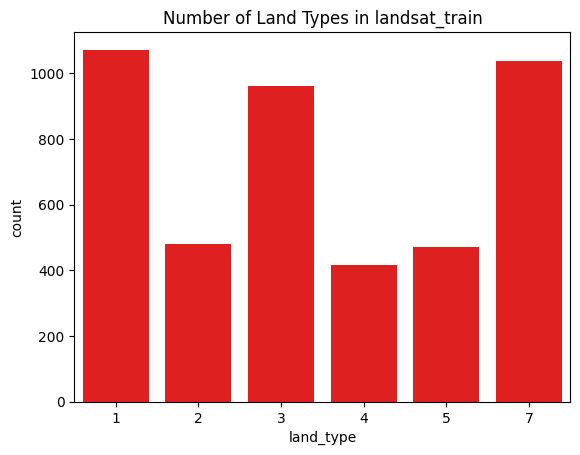

In [16]:
# Creating barplot to display the number of land types for landsat_test using sns
sns.countplot(x='land_type', data=landsat_train, color='red')
plt.title('Number of Land Types in landsat_train')
plt.show()

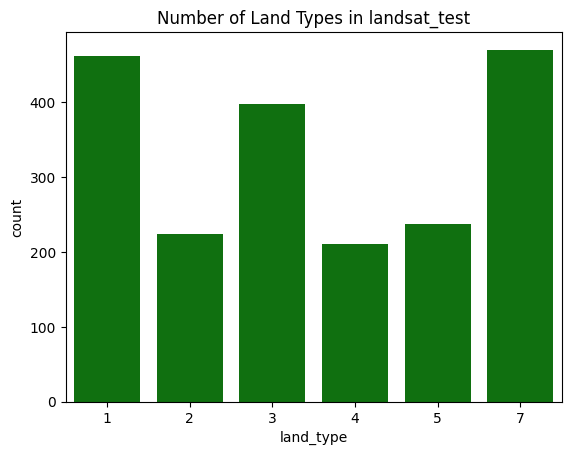

In [17]:
# Creating barplot to display the number of land types for landsat_test using sns
sns.countplot(x='land_type', data=landsat_test, color='green')
plt.title('Number of Land Types in landsat_test')
plt.show()

### Splitting Data into Train/Test

In [18]:
X_train = landsat_train.drop('land_type', axis=1)
X_test = landsat_test.drop('land_type', axis=1)
y_train = landsat_train['land_type']
y_test = landsat_test['land_type']

### Building the Pipeline

In [19]:
# getting numerical values
numerical_features = X_train.select_dtypes(include=['number']).columns

# Creating encoder for numerical values
encoder = ColumnTransformer(transformers=[
    ('num', MinMaxScaler(), numerical_features)])

# Creating pipeline
pipeline_rf = Pipeline([
    ('encoder', encoder),
    ('classifier', RandomForestClassifier())
])

### Executing the Model

In [20]:
#running the model
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['top_left_r', 'top_left_g', 'top_left_infra1', 'top_left_infra2',
       'top_middle_r', 'top_middle_g', 'top_middle_infra1',
       'top_middle_infra2', 'top_right_r', 'top_right_g', 'top_right_infra1',
       'top_right_infra2', 'middle_left_r', 'middle_left_g',
       'middle_left_infra1', 'middle_lef...
       'middle_right_r', 'middle_right_g', 'middle_right_infra1',
       'middle_right_infra2', 'bottom_left_r', 'bottom_left_g',
       'bottom_left_infra1', 'bottom_left_infra2', 'bottom_middle_r',
       'bottom_middle_g', 'bottom_middle_infra1', 'bottom_middle_infra2',
       'bottom_right_r', 'bottom_right_g', 'bottom_right_infra1',
       'bottom_right_infra2'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier())])

### Evaluating Model

In [22]:
 # Creating y_pred
 y_pred = pipeline_rf.predict(X_test)
 # Generate classification report
 print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.98      0.99      0.99       461
           2       0.98      0.98      0.98       224
           3       0.88      0.95      0.92       397
           4       0.76      0.61      0.68       211
           5       0.92      0.89      0.91       237
           7       0.86      0.89      0.87       470

    accuracy                           0.91      2000
   macro avg       0.90      0.89      0.89      2000
weighted avg       0.90      0.91      0.90      2000



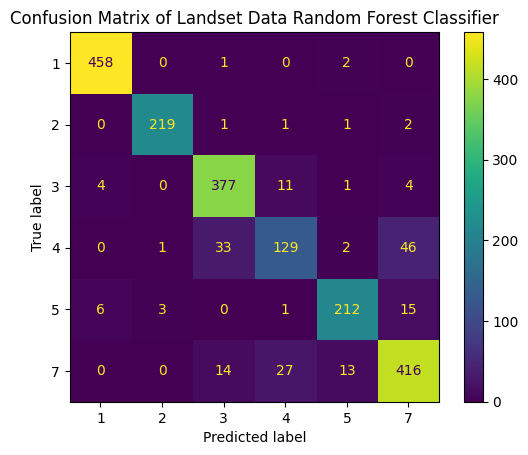

In [43]:
ConfusionMatrixDisplay.from_estimator(pipeline_rf, X_test, y_test)
plt.title('Confusion Matrix of Landset Data Random Forest Classifier')
plt.show()

### Conclusion
This model does a decent job of predicting the landing type. The f1-score comes back to be 0.90 which is a pretty good score for a prediciton model. However, there does seem to be some slight issues in predicting landing type 4 in the model. The model seems like it might have over fitted to the lower landing types. There are a lot of errors when looking at those two landing types. I think that this model is not overal applicaple for prediticing landing types as if there is a landing type of 4 there is a about a 38% and probabiltiy of an incorrect guess. I think that this landing type alone is what is bringing down the f1-score so much.  

## Problem 2

### Building the Pipeline

In [42]:
# getting numerical values
numerical_features = X_train.select_dtypes(include=['number']).columns

# Creating encoder for numerical values
encoder = ColumnTransformer(transformers=[
    ('num', MinMaxScaler(), numerical_features)])

# Creating pipeline
pipeline_vote = Pipeline([
    ('encoder', encoder),
    ('classifier', VotingClassifier(estimators=[('rf', RandomForestClassifier()), ('ada', AdaBoostClassifier())], voting='hard'))
])

### Executing the Model

In [46]:
#running the pipeline
pipeline_vote.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Pipeline(steps=[('encoder',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['top_left_r', 'top_left_g', 'top_left_infra1', 'top_left_infra2',
       'top_middle_r', 'top_middle_g', 'top_middle_infra1',
       'top_middle_infra2', 'top_right_r', 'top_right_g', 'top_right_infra1',
       'top_right_infra2', 'middle_left_r', 'middle_left_g',
       'middle_left_infra1', 'middle_lef...
       'middle_right_infra2', 'bottom_left_r', 'bottom_left_g',
       'bottom_left_infra1', 'bottom_left_infra2', 'bottom_middle_r',
       'bottom_middle_g', 'bottom_middle_infra1', 'bottom_middle_infra2',
       'bottom_right_r', 'bottom_right_g', 'bottom_right_infra1',
       'bottom_right_infra2'],
      dtype='object'))])),
                ('classifier',
                 VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                                              ('ada', AdaBoostClassifier())]))])

### Evaluating Model

In [47]:
 # Creating y_pred
 y_pred = pipeline_vote.predict(X_test)
 # Generate classification report
 print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.94      1.00      0.97       461
           2       0.61      0.99      0.75       224
           3       0.87      0.93      0.90       397
           4       0.59      0.69      0.63       211
           5       0.68      0.29      0.41       237
           7       0.91      0.73      0.81       470

    accuracy                           0.80      2000
   macro avg       0.77      0.77      0.75      2000
weighted avg       0.81      0.80      0.79      2000



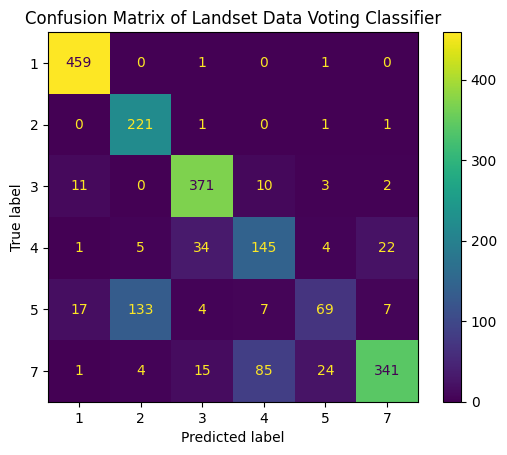

In [48]:
ConfusionMatrixDisplay.from_estimator(pipeline_vote, X_test, y_test)
plt.title('Confusion Matrix of Landset Data Voting Classifier')
plt.show()

### Conclusion
This model had an overall lower f1-score than the previous model of a score of 0.79. This model had the same problem as the last model in that it had lower predictions on a certain landing type. However, this model had more incorrect predictions on prediction label 5 then correct predictions. I would certainly not use this model for practical use.

## Problem 3


### Reading the Data

In [49]:
df = pd.read_csv('/content/gdrive/MyDrive/CS 430/MLA/MLA 5/banknote_authentication (1).csv')
df.head()

,variance,skewness,curtosis,entropy,forgery
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


### Splitting Data into Train/Test

In [51]:
# getting X and Y variables
X = df.drop('forgery', axis=1)
y = df['forgery']

# Splitting and into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Building the Pipeline

In [52]:
# getting numerical values
numerical_features = X_train.select_dtypes(include=['number']).columns

# Creating encoder for numerical values
encoder = ColumnTransformer(transformers=[
    ('num', MinMaxScaler(), numerical_features)])

# Creating pipeline
pipeline_rf = Pipeline([
    ('encoder', encoder),
    ('classifier', RandomForestClassifier())
])

### Executing the Model

In [53]:
#running the pipeline
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['variance', 'skewness', 'curtosis', 'entropy'], dtype='object'))])),
                ('classifier', RandomForestClassifier())])

### Evaluating Model

In [54]:
# getting y_pred
y_pred = pipeline_rf.predict(X_test)
# Generate classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       148
           1       1.00      0.99      1.00       127

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



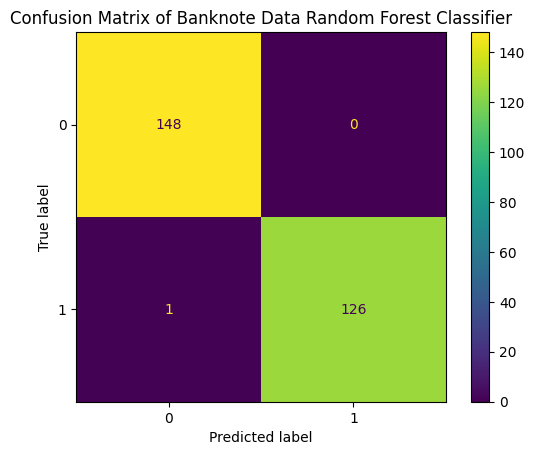

In [55]:
ConfusionMatrixDisplay.from_estimator(pipeline_rf, X_test, y_test)
plt.title('Confusion Matrix of Banknote Data Random Forest Classifier')
plt.show()

### Conclusion
This model had an f1-score of 1.00 which is amazing. However, the recall score was 0.99 and only came back with 1 type 2 error in this data set. I think that this model would be perfect for using in the real world. There was only one error in the whole data set which means that this model is doing an amazing job at predicting if a note is forged. I would recommed using this model.